# **Week 0 : Introduction to Python**
In this assignment, we shall be providing a class template where you have to fill code in indicated areas. Let's get started!


<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png"
 style="float:right;width:50px;height:50px;">

# **Importing Libraries**
Feel free to import any additional libraries required

In [1]:
# Import all libraries here 
import numpy as np 
import time 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LinearRegression

# Setting the seed for reproducible results


# *Problem 1*
In this problem, we will explore the concept of vectorising processes. Hence, we will focus upon eliminating as many for loops as possible and compare performance with and without for loops using python libraries.
We will be computing
\begin{equation}
s = \sum_{i=1}^{N}w.v[i]
\end{equation}
for a given matrix 
\begin{equation}
M = [v(1)\text{  }v(2){}_{\cdots}\text{  }v(N)]
\end{equation}

In the function : \\
1. iterative_mult(w) : Iteratively multiply the row vector w with each of the columns of the matrix M (using a for loop), and return the addition of all results.
2. matrix_mult(w) : Multiply the row vector w with the matrix M and add the resulting columns using a function of the numpy library.
3. comparison(w) : Call the previous two functions here and measure the time taken in each of them using a python library. Store the times in variables time_iterative, time_matrix.

In [20]:
class Tester : 
    def __init__(self, M) :  
     self.M = np.array(M)

    def iterative_mult(self , w) :
        finalsum=0
        #w=np.array(w)
        for i in range(len(self.M[0])):
            for t in range(len(w)):
                finalsum+=self.M[t][i]*w[t]
        return finalsum
    
    ### INSERT CODE ABOVE ### 

    def matrix_mult(self , w) :
        
        w=np.array(w)
        w=w.reshape(-1,1)
        result = np.dot(self.M.T, w) 
        return np.sum(result)
    ### INSERT CODE ABOVE ###

    def comparison(self , w) :
        start_time_iterative = time.time()
        result_iterative = self.iterative_mult(w)
        time_iterative = time.time() - start_time_iterative

        start_time_matrix = time.time()
        result_matrix = self.matrix_mult(w)
        time_matrix = time.time() - start_time_matrix
  ### INSERT CODE BELOW  ###

    
    ### INSERT CODE ABOVE ###

        print(f'Time taken by iterative method : {time_iterative}\nTime taken by matrix method : {time_matrix}')

        return time_iterative, time_matrix

Now that we have created a tester class with some basic functionality of performance analysis, we will plot the time taken in both the methods of computing the required quantity. That is, given a row vector w, we want to compute :              

\begin{equation}
s = \sum_{i=1}^{N}w.v(i)
\end{equation}
For this purpose, we will use the matplotlib library in python. 

Time taken by iterative method : 0.0
Time taken by matrix method : 0.0
Time taken by iterative method : 0.006192922592163086
Time taken by matrix method : 0.0
Time taken by iterative method : 0.00047898292541503906
Time taken by matrix method : 0.0
Time taken by iterative method : 0.004325151443481445
Time taken by matrix method : 0.0
Time taken by iterative method : 0.09387421607971191
Time taken by matrix method : 0.0


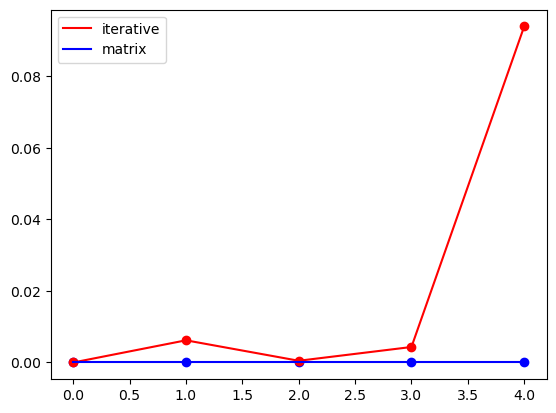

In [21]:
w = np.random.randn(1, 100)
results = []
max_pow = 5

for i in range(max_pow) : 
    M=np.random.randn(100,10**i)
    obj=Tester(M)
    time_iterative,time_matrix=obj.comparison(w)
    results.extend([time_iterative,time_matrix])
    
  #1. Computing the times using Tester object defined above
  #2. Append the times to the results array
    
  ### INSERT CODE BELOW ###
    
    #M=np.random.randn(100,10**i)
    #obj=Tester(M)
    #obj.comparison(w)
    
  ### INSERT CODE ABOVE ###

'''
Now, plot the (line) graph with the axes as : 
1. X-axis : The 2nd dimension of the matrix M
2. Y-axis : The times taken for the two processes

Additionally, you must use a legend in order to distinguish the graphs of the two processes.
'''

### INSERT CODE BELOW ###
x=np.array([0,1,2,3,4])
x=x.reshape(-1, 1)
#print(results[0:len(results)-1:2])
#print(results[1:len(results):2])
y_ite=results[0:len(results)-1:2]
y_mat=results[1:len(results):2]
plt.scatter(x,y_mat,color='blue')
plt.plot(x,y_ite,'r',label='iterative')
plt.plot(x,y_mat,'b',label='matrix')
plt.scatter(x,y_ite,color='red')
plt.legend()
plt.show()
### INSERT CODE ABOVE ###

# **Observations**

Now that we have successfully plotted the graphs, you can comment on the differences in the two times of computation. Please write your observations in the text box provided below. Make sure to note down the following : \\
1. The approximate order of times obtained in the two processes (s/ms/$\mu$s/ns)
2. The method which results in lower computation times and by what factor
3. Some possible explanation for your observation (after some googling perhaps)

Insert observations here (double-click to edit the cell)

1. the order(unit) of time ordered is in seconds
2. matrix method results in lower computation time
3. the time taken is less due to highly optimized algorithms, often implemented in optimized libraries (like NumPy in Python)

# *Problem 2*

In this assignment, you will be loading the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset (a large dataset of hand-written images of numbers) from a *CSV* (comma separated values) file and performing various operations on them. 

Enjoy!





<img src="https://journaldev.nyc3.digitaloceanspaces.com/2020/10/mnist-dataset.png"
 style="float:right;width:50px;height:50px;">

# **Loading Data**
Let's start by loading the csv file in the main repo. Figure out how to load a file onto Google Colab (or whichever notebook you're using). The data can be downloaded from [here](https://drive.google.com/file/d/1p-rZZRrdbK05uIwRvwnkinpJI5o2griD/view?usp=share_link)


In [4]:
# Insert code to load the csv file into the notebook
#train_file=pd.read_csv('C:\\Users\\Mandakini\\Desktop\\mnist_train.csv')
#test_file=pd.read_csv('C:\\Users\\Mandakini\\Desktop\\mnist_test.csv')

trfle = pd.read_csv(r'C:\Users\Mandakini\Desktop\mnist_train.csv')

#inside the single quotes, we have to paste the address of the given file

# **Reading from a CSV File**
Now, let's read the values from the csv file! If you were to look into the file, you would see that each row has a long list of numbers, with the first column having numbers between **$0$ and $9$**, and the remaining columns having values from **$0$ to $255$** (make any sense?)

Feel free to store the data in any way you want, to set up future operations with those rows (you might want to read the following tasks before deciding how you would store this data, if it helps). 

Also, make use of the `csv` module to read csv files. There are many other ways, but this should do for this assignment at least.

In [5]:
# Insert code to store the contents of the file in a variable (or many variables, if you want)
import csv

fpath='C:\\Users\\Mandakini\\Desktop\\mnist_test.csv'

labels=[]
pixels=[]

with open(fpath,'r') as file:
    reader=csv.reader(file)
    next(reader)    #skipping the header row
    for row in reader:
        labels.append(int(row[0]))
        pixels.append([int(pixel) for pixel in row[1:]])
        
pixels=np.array(pixels)
labels=np.array(labels)


# **Organising Data**

If you didn't figure out what the first column was supposed to be, no worries : they are the labels of the corresponding images. The remaining $784$ columns ($28 \times 28$) correspond to the *gray-scale pixel values* of the $784$ pixels present in each image of a number.

For example, the first row in the dataset has a label of $7$, signifying that the next $784$ values correspond to an image of the number $7$. These $784$ pixels are ordered **row-wise**, so the first $28$ are for the first row, the next $28$ for the second, and so on.

Your tasks are the following : 

* Separate out the first column of values and store them separately as labels, you'll need them later

* Once you're done with that, reshape the rows (after the removal of the labels) into matrices with dimension $28 \times 28$ (If you've learnt *anything* from the first assignment, it should be to avoid using loops as much as possible, so think of, or search for, an inbuilt function that can reshape a matrix)

**Note** : Just like vectors have a *depth* of $1$ and matrices have a *depth* of $2$, `NumPy` supports objects that can have a *depth* greater than $2$. 

This generalisation can be thought of as a **Tensor**, and the *depth* is called the *rank* or the *order* of the Tensor. If you've stored your initial data as a matrix, try and reshape it into a tensor of rank $3$, for the second task.

In [6]:
# Write your code here

#converting into a tensor such that the matrix is 28x28
pixels=pixels.reshape(-1,28,28)

# **Plotting images**
Now that you have the data, in the form we want it in, go ahead and plot the first image! (Google it!)

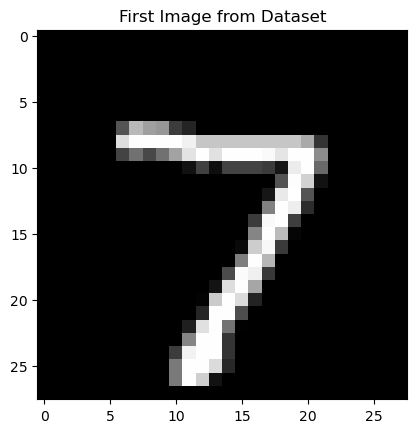

In [7]:
# Write your code here
plt.imshow(pixels[0],cmap='gray')
plt.title('First Image from Dataset')
plt.show()

###### **Grouping Images**

Let's try and group those images together, based on their labels. This is slightly (maybe more than slightly) harder to understand (just using inbuilt functions), but the objective is the same : To try and minimise the number of iterations performed outside of NumPy

Hint : You could also do this with $10$ iterations, which is the number of digits, and with $60000$ iterations, which is the number of images we have, so if you can't find any way without loops, try to find a way with $10$ iterations rather than $60000$

In [28]:
# Write your code here

grp_img={}       #stores grouped images

for digit in range(10):
    i=np.where(np.array(labels)==digit)[0]
    grp_img[digit]=pixels[i]


# **Computing Mean Images**

Now that we have our data grouped, let's try to calculate the mean of the images corresponding to a particular label.

Don't forget to plot all of them!

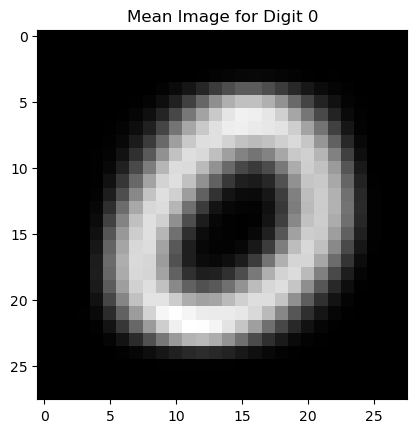

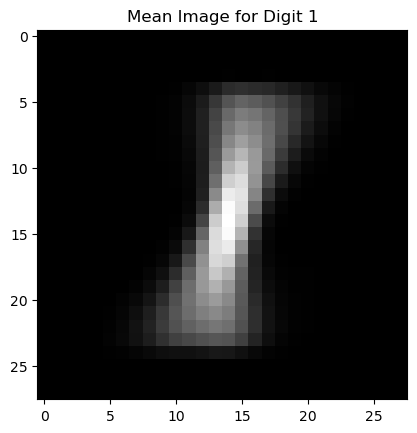

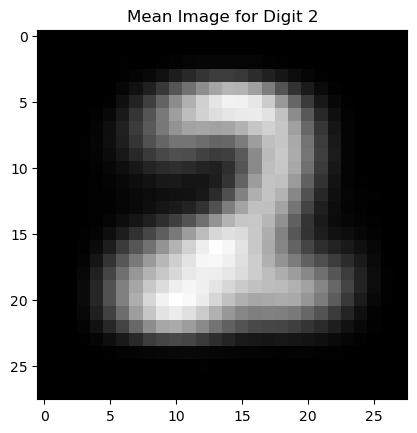

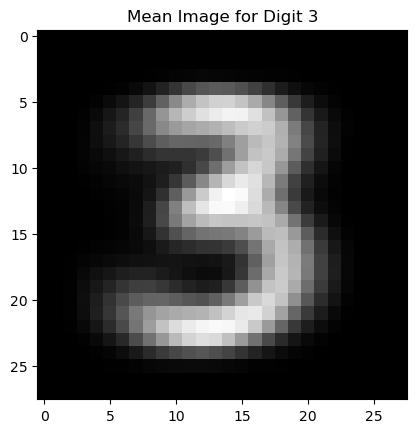

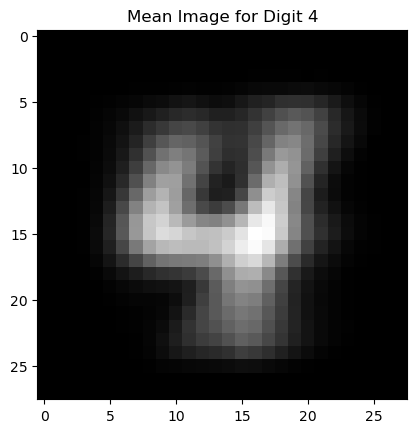

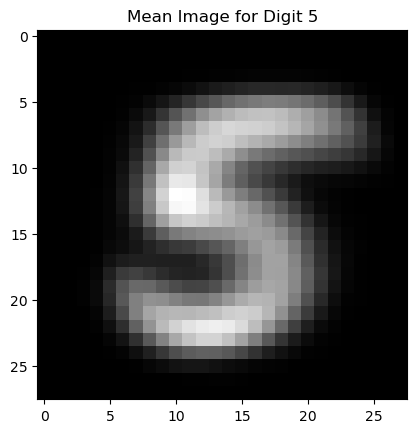

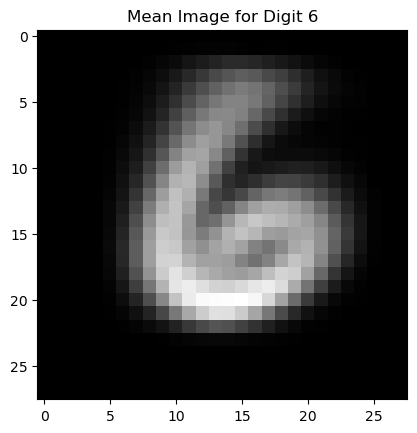

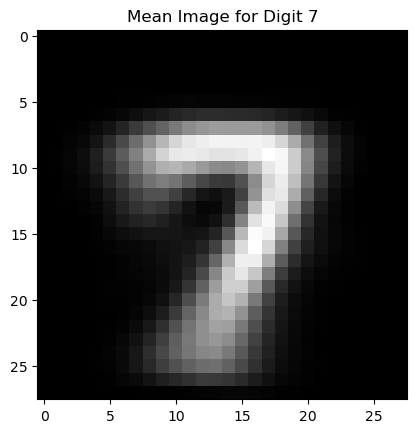

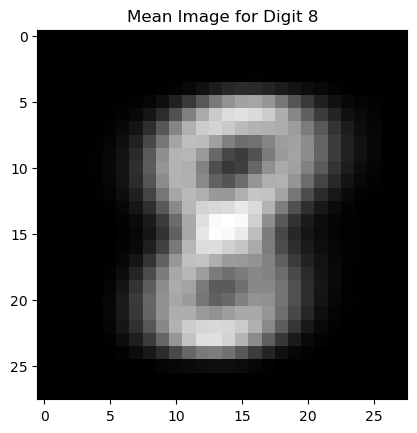

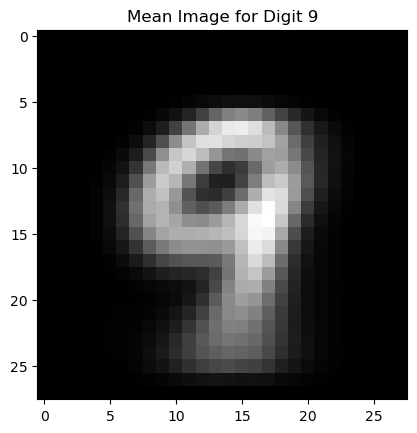

In [31]:
# Write your code here for an array of 10 images, each representing the mean image of a number from 0 to 9, in order. Also plot!

mean={}


#print(mean[2])

for digit, images in grp_img.items():
    mean[digit] = np.mean(images, axis=0)

# Plot mean images for each digit
for digit, mean_img in mean.items():
    plt.imshow(mean_img, cmap='gray')
    plt.title(f"Mean Image for Digit {digit}")
    plt.show()

# **Submission**

Please upload the edited version of this notebook in the github classroom, with your file labelled as \<roll_number\>_week0.ipynb